# **Neural Network Type Classification | TMNIST**

## **Author: Mrunali Pawar**

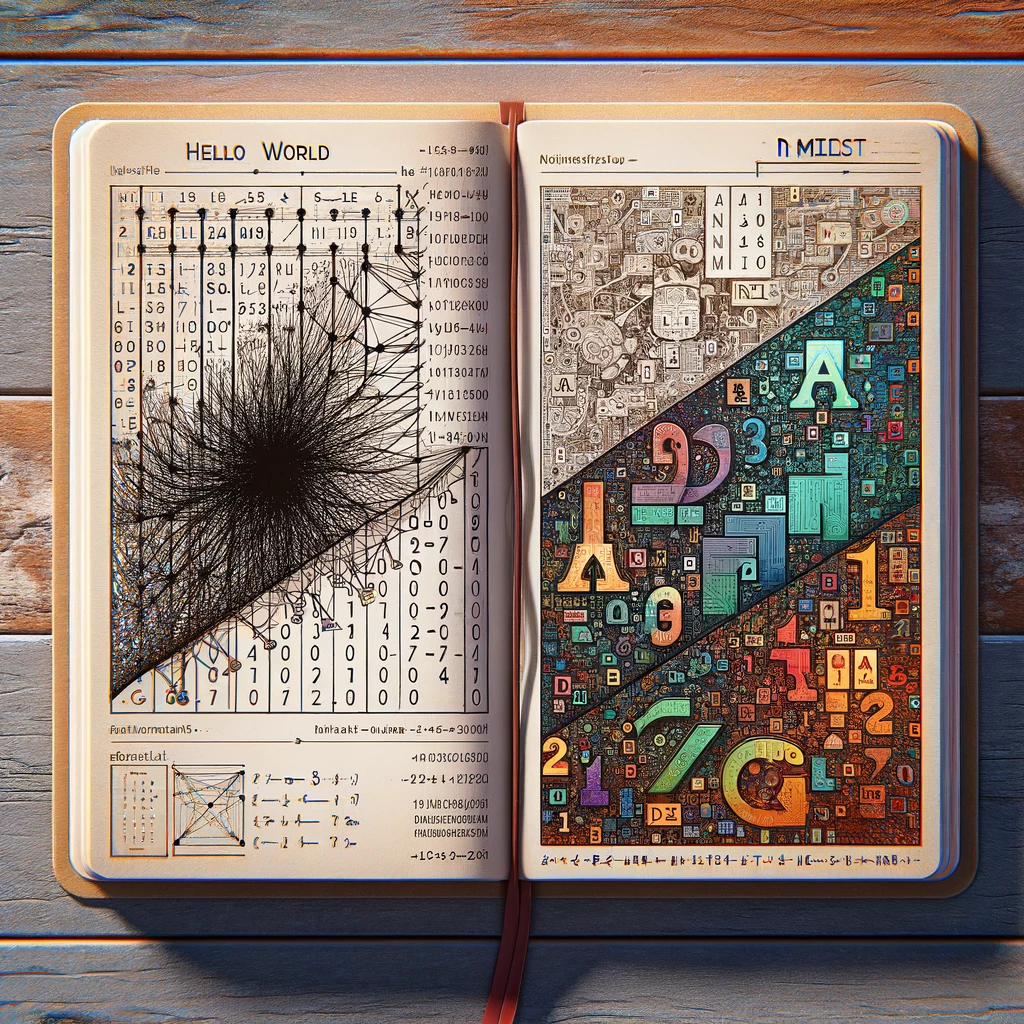

## **OBJECTIVE**

The objective of this notebook is to carry out character recognition on the TMNIST dataset, which encompasses 94 distinct characters. To achieve this, I have implemented a straightforward convolutional neural network (CNN) composed of three layers. Upon evaluation, the CNN demonstrated a commendable performance, achieving an accuracy rate of approximately 93.72%. This level of accuracy is quite impressive, considering the relative simplicity of the CNN's architecture.

# **ABSTRACT**

In the realm of machine learning and computer vision, character recognition stands as a fundamental challenge, bridging the gap between digital and handwritten texts. This tutorial delves into the intricacies of handwritten character recognition using the TMNIST dataset, an extended variant of the classic MNIST dataset that includes 94 distinct handwritten characters. Unlike its numerical predecessor, the TMNIST dataset presents a broader array of patterns, offering a more complex challenge that mirrors real-world applications. My objective is to navigate through the dataset, employ pre-processing techniques, and design a neural network capable of achieving high accuracy in character recognition. Utilizing TensorFlow and Keras, I will construct, train, and evaluate our model, ensuring a comprehensive understanding of the workflow required for tackling such machine learning tasks.

**Importing libraries**

In [1]:
!pip install gdown
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import gdown

#https://drive.google.com/file/d/1QjSwrW7pTyZleVIRiNgPPvaPHlIUuJOL/view?usp=sharing

# Replace 'FILE_ID' with the actual File ID
file_id = '1QjSwrW7pTyZleVIRiNgPPvaPHlIUuJOL'

# Define the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file name
output_file = '94_character_TMNIST.csv'

# Download the file
gdown.download(url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1QjSwrW7pTyZleVIRiNgPPvaPHlIUuJOL
From (redirected): https://drive.google.com/uc?id=1QjSwrW7pTyZleVIRiNgPPvaPHlIUuJOL&confirm=t&uuid=5f5c36dd-6372-42f4-9360-0b6a62531931
To: /content/94_character_TMNIST.csv
100%|██████████| 941M/941M [00:12<00:00, 75.1MB/s]


'94_character_TMNIST.csv'

# **Load TMNIST Dataset into dataframe**

In [4]:
data = pd.read_csv('94_character_TMNIST.csv')

# Display the first few rows of the DataFrame
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


names     0
labels    0
1         0
2         0
3         0
         ..
780       0
781       0
782       0
783       0
784       0
Length: 786, dtype: int64

In [6]:
print(data.columns)

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)


## **Separate the input features from the output labels**
The resulting features DataFrame will be used to train the model and contains only the data necessary for learning.

In [7]:
# Features for the model (Dropping unnecessary columns to isolate features)
features = data.drop(['labels', 'names'], axis=1)

# Isolating the target variable
labels = data['labels']

Creating two dictionaries. One that maps numerical values to labels, and another that maps labels back to numerical values. This is useful for encoding and decoding categorical labels.

In [8]:
# Extract unique labels from the data
unique_labels = data['labels'].unique()

# Create a dictionary mapping each label to a unique integer value
label_to_value = {label: index for index, label in enumerate(unique_labels)}

# Create a reverse dictionary mapping each integer value back to its corresponding label
value_to_label = {index: label for label, index in label_to_value.items()}

# **Visualizing Handwritten Digit Images with Labels**

Matplotlib, a popular visualization library, to display the first 50 images from a dataset, likely containing handwritten digits, in a structured format. Each image is shown in its own subplot within a larger figure, arranged in a grid of 5 rows and 10 columns.

The images are displayed without axis ticks for a cleaner look, and each subplot is labeled with a corresponding digit from the dataset. This visualization is helpful for understanding the characteristics of the data and ensuring the images are correctly labeled before proceeding with further analysis or model training

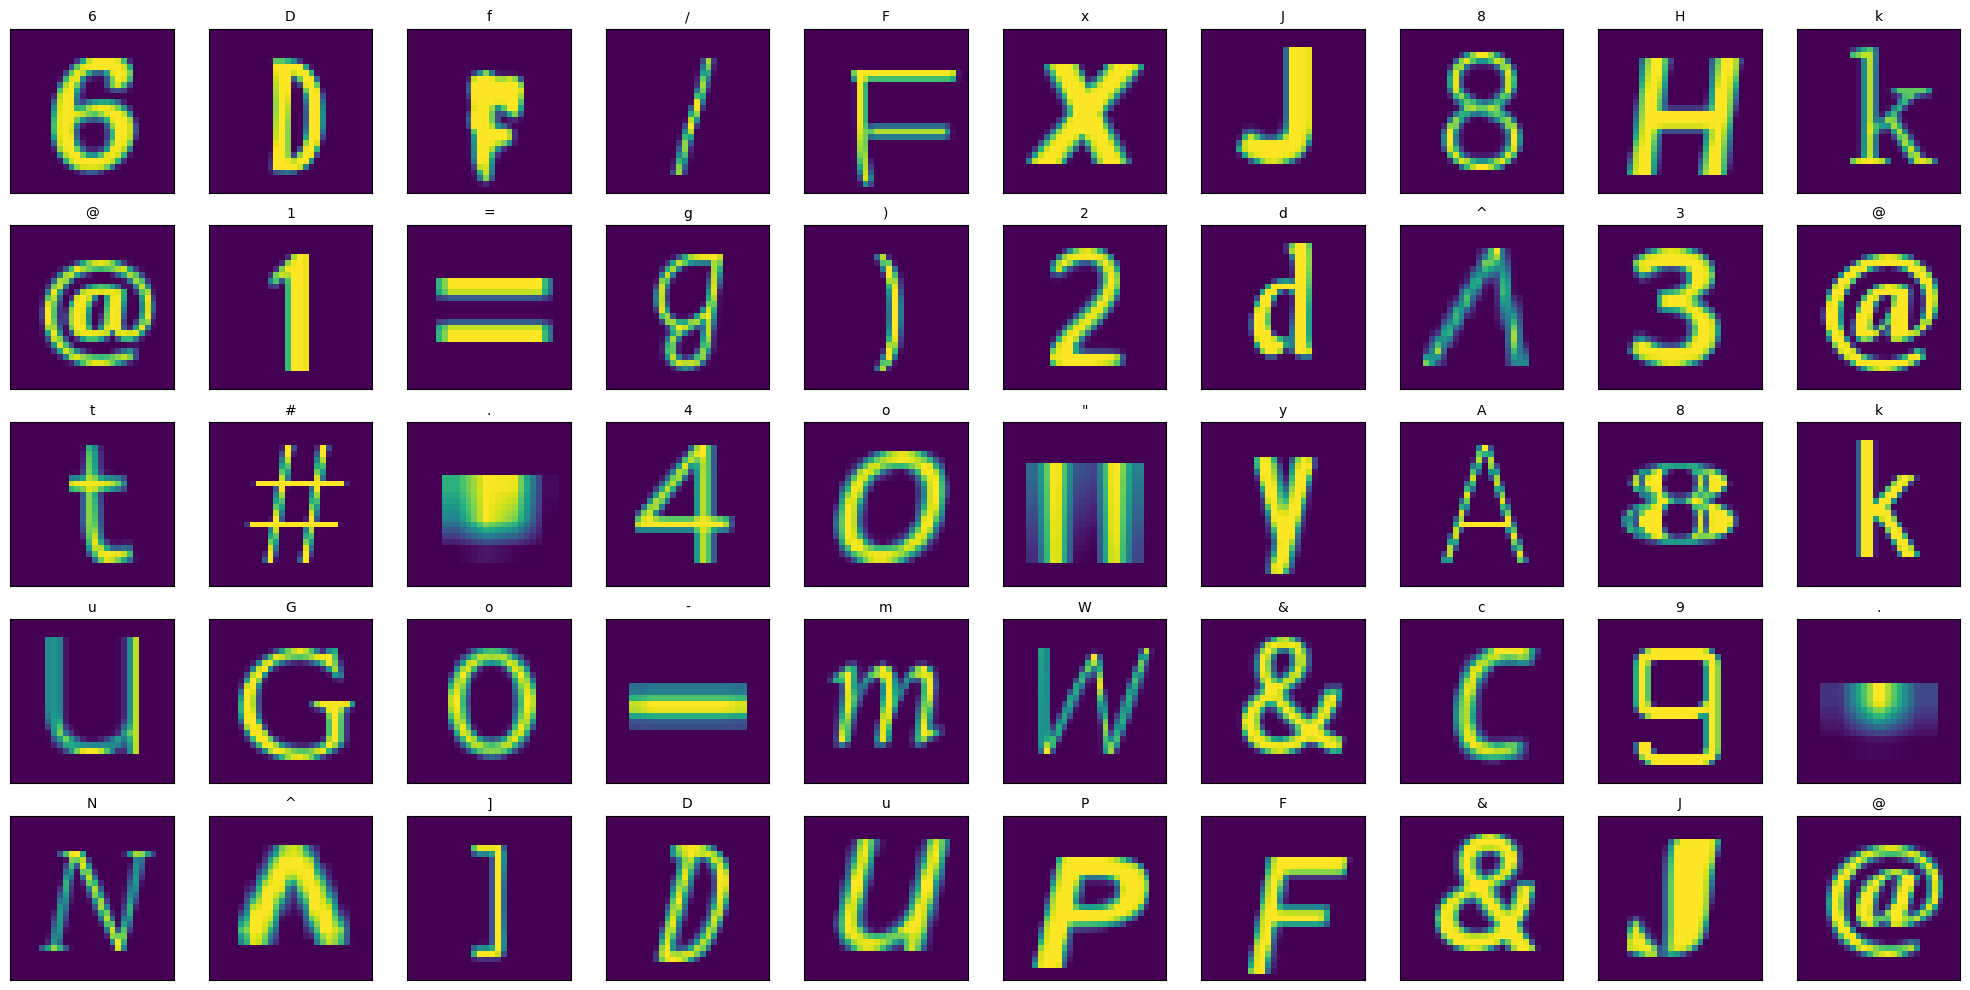

In [9]:
import matplotlib.pyplot as plt

# Set the size of the entire figure
plt.figure(figsize=(20, 10))

# Plot the first 50 images and labels
for i in range(50):
    # Add a new subplot iteratively
    plt.subplot(5, 10, i + 1)

    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

    # Set the title of each subplot to be the corresponding label
    plt.title(labels.iloc[i], fontsize=10)

    # Reshape the feature vector to 28x28 and plot it
    image = features.values[i].reshape(28, 28)
    plt.imshow(image, cmap='viridis')

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features, labels, test_size=0.20, random_state=42)

# **One-Hot Encoding of Label Data**

Categorical labels are converted into a format that is suitable for training machine learning models, especially neural networks, which require numerical input. This method also ensures that the model treats each category as a separate feature without assuming any ordinal relationship between them.

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the y_train data and transform y_train
y_train_encoded = enc.fit_transform(y_train.values.reshape(-1, 1))

# Transform y_test data using the same encoder
y_test_encoded = enc.transform(y_test.values.reshape(-1, 1))

y_train_encoded = y_train_encoded.astype('float32')
y_test_encoded = y_test_encoded.astype('float32')

# Return the transformed y_train and y_test
y_train_encoded, y_test_encoded

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

The output shows two arrays representing the one-hot encoded forms of y_train and y_test. Each array consists of rows filled with zeros, with each row corresponding to a label from the original dataset that has been converted into a binary vector. Each vector is typically sparse, containing mostly zeros, with a single '1' marking the presence of a particular category. The conversion to type float32 is aimed at optimizing memory usage and computational efficiency for subsequent machine learning processes

The original data is in a flattened format, where each image is represented as a long array of pixel values. The reshaping is necessary because Convolutional Neural Networks (CNNs) require input data in a specific shape - typically, the height x width x channels of the image.

This do not change the content of the images but modify their format to be suitable for processing by the neural network. So after reshaping, the images can be processed by the convolutional layers of a CNN, and after normalization, the model can train more efficiently

In [12]:
num_pixels = 28 * 28
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)  # -1 infers the number of samples
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the pixel values of the images to be between 0 and 1
# This is done by converting the datatype to float32 and dividing by the max pixel value (255)
X_train_normalized = X_train_reshaped.astype('float32') / 255.
X_test_normalized = X_test_reshaped.astype('float32') / 255.

# Print out the new shapes of the training and test datasets
print('Shape of X_train after reshaping and normalization:', X_train_normalized.shape)
print('Shape of X_test after reshaping and normalization:', X_test_normalized.shape)

Shape of X_train after reshaping and normalization: (219274, 28, 28, 1)
Shape of X_test after reshaping and normalization: (54819, 28, 28, 1)


The dimensions (219274, 28, 28, 1) for X_train and (54819, 28, 28, 1) for X_test describe datasets where each image is represented as a 28x28 pixel grid with a single color channel (grayscale). This reshaping aligns with the requirements for Convolutional Neural Networks (CNNs) which process input in this form, enabling the model to effectively learn from the spatial structure and pixel values of the images

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_data = data_generator.flow(X_train_reshaped, batch_size=32)

# **Constructing a CNN Model for Image Classification**

A Convolutional Neural Network (CNN) using TensorFlow's Keras API. CNNs have proven exceptionally effective for image recognition tasks due to their ability to capture spatial hierarchies in data. Here CNN will process images, learn distinguishing features, and classify them into various categories.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Third Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Flattening the output to feed into a Dense layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Fully Connected Layer 2 (Output Layer)
# The number of neurons equals the number of classes
num_classes = data['labels'].nunique()
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


* **model.compile()** configures the model for training.
* **optimizer='adam'** is an algorithm for gradient descent optimization.
* **loss='categorical_crossentropy'** is the loss function, suitable for multi-class classification.
* **metrics=['accuracy']** means that the model will track accuracy during training.

The "sequential" model is a medium-sized CNN appropriate for image classification tasks. It uses a series of convolutional layers to extract features from the input data, pooling layers to reduce dimensionality, and dropout layers to combat overfitting. Finally, it employs dense layers to make predictions across multiple classes. The architecture is designed to learn a hierarchy of features with increasing levels of abstraction, which is typical for deep learning models applied to visual recognition tasks.

## **Model summary**

In [15]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0


The model consists of several layers, each designed to process image data and ultimately classify the images into one of 94 classes.

* The model has a total of 184,862 parameters, all of which are trainable. This means the model has nearly 185k values that will be adjusted during the training process to minimize the classification error.

* The total size of the model is approximately 722.12 KB, which represents the memory footprint required to store the model's parameters.

In [16]:
# For features
print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)

# For labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train_normalized: (219274, 28, 28, 1)
Shape of X_test_normalized: (54819, 28, 28, 1)
Shape of y_train_encoded: (219274, 94)
Shape of y_test_encoded: (54819, 94)


In [17]:
print("Data type of X_train_normalized:", X_train_normalized.dtype)
print("Data type of y_train_encoded:", y_train_encoded.dtype)

Data type of X_train_normalized: float32
Data type of y_train_encoded: float32


## **Customizing Learning Rate Adjustments with TensorFlow's Keras API**

The scheduler is particularly useful in training scenarios where the model's performance might benefit from reducing the learning rate as the training epochs increase. This approach helps to fine-tune the model by reducing the step size of updates, which can prevent overshooting the minima of the loss function and improve the model's final accuracy and stability.

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

### **Enhancing Model Training with Early Stopping**

Early Stopping is a form of regularization used to avoid overfitting by halting the training process if the model's performance ceases to improve on a held-out validation dataset.

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Keras to adjust the learning rate according to the scheduler function at the end of each epoch during training to avoid overshooting the minimum and can potentially lead to a better and more stable model.

### **Details of the Training Process:**

**model.fit(...):** This is the method used to train the model on the training data. It adjusts the model weights to minimize the loss function using the provided data and settings.

**Parameters:**

* **X_train_normalized:** The training data that has been normalized. Normalization is crucial for neural network models as it ensures that all input features have the same scale, leading to faster and more stable training.
* **y_train_encoded:** The target labels for the training data, which have been one-hot encoded. This encoding transforms categorical labels into a format that's suitable for classification tasks with multiple classes.
* **validation_data=(X_test_normalized, y_test_encoded):** A tuple containing the normalized test data and its corresponding one-hot encoded labels. Validation data is used to evaluate the model's performance at the end of each epoch during training, providing insights into how well the model is likely to perform on unseen data.
* **epochs=10:** Specifies the number of times the training algorithm will work through the entire training dataset. An epoch represents a complete pass over all the training data.
* **batch_size=64:** Determines the number of samples that will be propagated through the network before the model updates its internal parameters. Smaller batch sizes generally lead to a more stable convergence, at the cost of increased computation time.
* **verbose=1:** This parameter controls the verbosity of the training process output. verbose=1 indicates that progress will be printed to the console, which helps in monitoring the training process directly.

In [20]:
history = model.fit(X_train_normalized, y_train_encoded, validation_data=(X_test_normalized, y_test_encoded), epochs=20, batch_size=64, verbose=1)

Epoch 1/20
3427/3427 [==============================] - 518s 151ms/step - loss: 0.7679 - accuracy: 0.7783 - val_loss: 0.3230 - val_accuracy: 0.9009
Epoch 2/20
3427/3427 [==============================] - 511s 149ms/step - loss: 0.3873 - accuracy: 0.8799 - val_loss: 0.2711 - val_accuracy: 0.9157
Epoch 3/20
3427/3427 [==============================] - 492s 144ms/step - loss: 0.3343 - accuracy: 0.8951 - val_loss: 0.2419 - val_accuracy: 0.9219
Epoch 4/20
3427/3427 [==============================] - 508s 148ms/step - loss: 0.3108 - accuracy: 0.9018 - val_loss: 0.2434 - val_accuracy: 0.9189
Epoch 5/20
3427/3427 [==============================] - 507s 148ms/step - loss: 0.2942 - accuracy: 0.9064 - val_loss: 0.2356 - val_accuracy: 0.9215
Epoch 6/20
3427/3427 [==============================] - 508s 148ms/step - loss: 0.2840 - accuracy: 0.9085 - val_loss: 0.2133 - val_accuracy: 0.9321
Epoch 7/20
3427/3427 [==============================] - 508s 148ms/step - loss: 0.2762 - accuracy: 0.9113 - val_

The history object returned by model.fit() contains records of training and validation loss values, along with metrics (like accuracy if specified) at each epoch

## **Get a batch of augmented images**

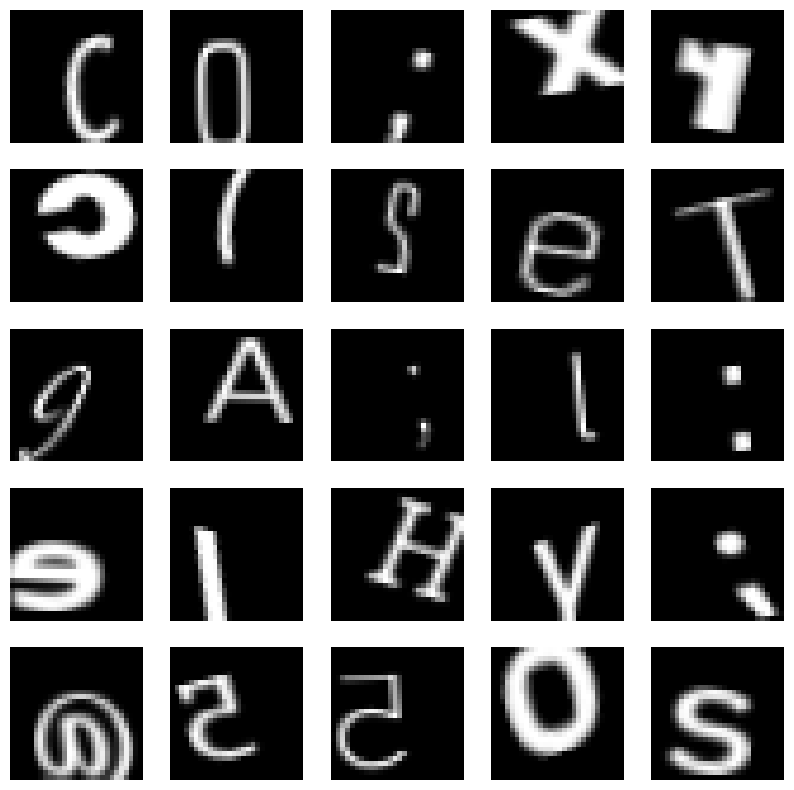

In [21]:
augmented_images = next(augmented_data)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [22]:
print("Shape of the first image:", augmented_images[0].shape)

Shape of the first image: (28, 28, 1)


Evaluating a trained machine learning model's performance on a test dataset and making predictions with that model.

In [23]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)

y_labels_pred = model.predict(X_test_normalized)

1714/1714 [==============================] - 38s 22ms/step - loss: 0.1945 - accuracy: 0.9372
Test accuracy: 0.9372480511665344
1714/1714 [==============================] - 35s 20ms/step


## **Evaluate the model on the test dataset**

In [24]:
evaluation = model.evaluate(X_test_normalized, y_test_encoded, batch_size=64, verbose=1)

# Extract loss and accuracy from the evaluation result
test_loss, test_accuracy = evaluation[0], evaluation[1]

# Print a formatted summary of the results
print(f'\nTest Evaluation Summary:')
print(f'\tTest Loss: {test_loss:.2f} - This value represents the average loss of the model on the test dataset.')
print(f'\tTest Accuracy: {test_accuracy * 100:.2f}% - This percentage indicates how often the model correctly predicted the label out of all test samples.')

857/857 [==============================] - 32s 37ms/step - loss: 0.1945 - accuracy: 0.9372

Test Evaluation Summary:
	Test Loss: 0.19 - This value represents the average loss of the model on the test dataset.
	Test Accuracy: 93.72% - This percentage indicates how often the model correctly predicted the label out of all test samples.


* **Test Loss (0.19):** The test loss value represents the average loss incurred by the model when making predictions on the test dataset. In this case, the average loss is 0.19, which indicates how well the model's predictions match the true labels in the test set. Lower values are generally better, as they indicate that the model's predictions are closer to the actual labels.

* **Test Accuracy (93.72%):** The test accuracy percentage indicates the proportion of correctly predicted labels out of all test samples. In this case, the model achieved an accuracy of 93.72%, meaning that it correctly predicted the labels for approximately 93.72% of the test samples. Higher accuracy values indicate that the model's predictions align well with the true labels in the test set.

Overall, a test accuracy of 93.72% and a test loss of 0.19 indicate that the model performs reasonably well on the test dataset.

## **Making Predictions and Decoding Labels in Neural Network Evaluation**


To use a trained neural network model to make predictions on test data and process the output to evaluate model performance. This process is crucial for assessing how well the model has learned to generalize from the training data to new, unseen data.

In [25]:
# Make predictions
predictions = model.predict(X_test_normalized)
predicted_classes = np.argmax(predictions, axis=1)

# Inverse transform your encoded y_test data to its original form if it's one-hot encoded
true_classes = np.argmax(y_test_encoded, axis=1)

1714/1714 [==============================] - 31s 18ms/step


Outputs the probability distributions across all classes for each image.

Each image is displayed with two labels:
* the true label
* the model's predicted label.

This dual labeling helps in directly observing the instances where our model performs well and where it makes errors.

## **Visualizing Predicted vs. True Labels for TMNIST Handwritten Digit Classification**

To visualize the results of a classification model by comparing predicted labels to true labels on a subset of test images.

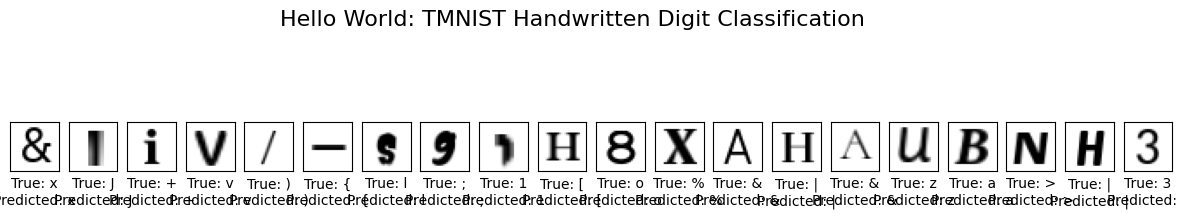

In [26]:
# number of images you want to display
num_images_to_display = 20

# Set up the figure
plt.figure(figsize=(15, 5))

# Add a main title to the figure
plt.suptitle('Hello World: TMNIST Handwritten Digit Classification', fontsize=16)

for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_normalized[i].reshape(28, 28), cmap=plt.cm.binary)
    # Label each image with its corresponding true and predicted labels
    plt.xlabel(f"True: {value_to_label[true_classes[i]]}\nPredicted: {value_to_label[predicted_classes[i]]}")

# Show the plot
plt.show()

a convolutional neural network (CNN) for the task of character recognition within the TMNIST dataset, which contains 94 different characters.

## **Predicting characters using the trained model and displaying the results**

To use a trained neural network to predict handwritten characters and visually display these predictions along with the input images.

1/1 [==============================] - 0s 32ms/step


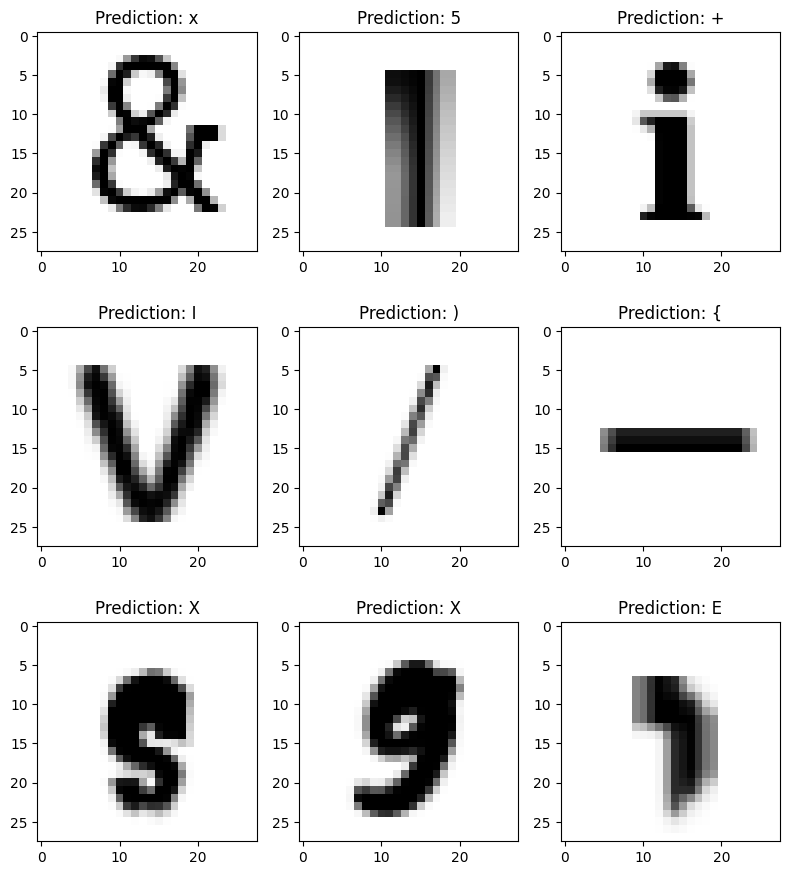

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(8, 9))  # Set up a 3x3 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
label_dict_inv = {v: k for k, v in label_to_value.items()}
X_test_np = X_test.to_numpy()
for i, ax in enumerate(axes):
    #img = np.reshape(X_test.iloc[i].to_numpy(), (28, 28))
    img = np.reshape(X_test_np[i], (28, 28))
    ax.imshow(img, cmap="Greys")  # Display the image in grayscale

    img_for_prediction = np.reshape(img, (1, 28, 28, 1))  # Reshape the image for model input
    pred_class_index = np.argmax(model.predict(img_for_prediction))  # Predict the class
    predicted_label = label_dict_inv[pred_class_index]  # Retrieve the label from the dictionary

    ax.set_title(f"Prediction: {predicted_label}")  # Set the title with the predicted label
    ax.grid(False)  # Disable the grid for a cleaner look

plt.tight_layout()  # Adjust layout for better visibility
plt.show()  # Display the plot


## **Plotting Training and Validation Metrics**

To extract and plot training and validation metrics from a neural network training session. This visual representation is crucial for understanding how the model performs over epochs and assessing whether it is learning effectively, overfitting, or underfitting.

In [28]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit()
history_dict = history.history

# Values of loss and accuracy during training
train_loss = history_dict['loss']
train_accuracy = history_dict['accuracy']

# Values of loss and accuracy during validation
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

* **Loss Plot:** Helps identify points where the model might start overfitting. Ideally, both training and validation loss decrease and then plateau. If validation loss increases while training loss continues to decrease, it indicates overfitting.

* **Accuracy Plot:** Shows the progression of model accuracy on the training and validation sets. Plateaus or divergences in accuracy trends can signal when the model has stopped learning effectively or when it might benefit from further tuning of hyperparameters or training for more epochs.


## **Plot for training and validation loss**

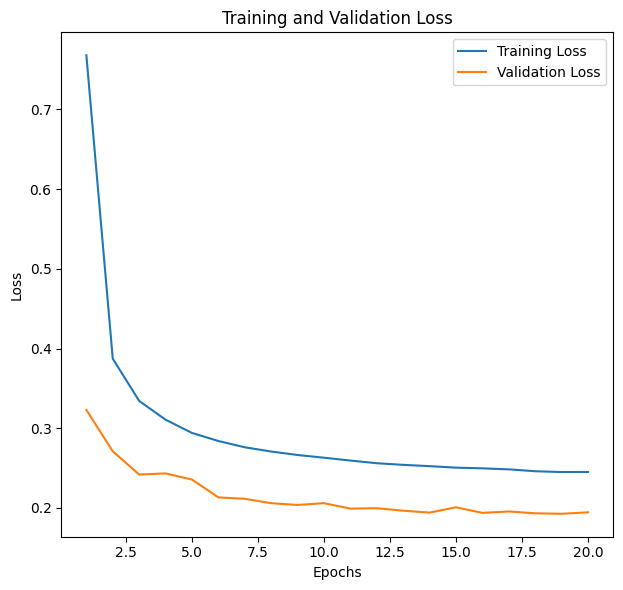

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

* **The Training Loss** (depicted in blue) shows a sharp decrease initially, then levels off, reflecting the model's rapid initial learning and subsequent stabilization as it begins to converge.
* **The Validation Loss** (depicted in orange) decreases at a slower rate compared to the training loss. The convergence of validation loss at a higher value than training loss is typical and reflects the discrepancy between the model's performance on training versus unseen data.

**The fact that both losses are decreasing is a positive sign, indicating that the model is learning.**

## **Plot for training and validation accuracy**

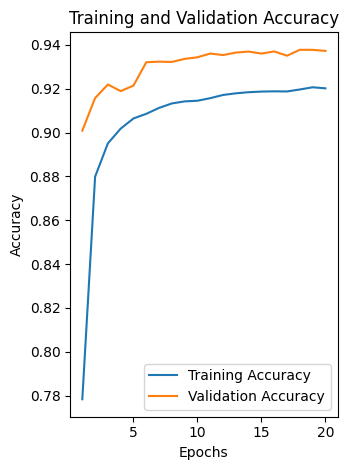

In [30]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* **The Training Accuracy** (depicted in blue) starts at a high value and steadily increases over epochs, suggesting that the model is effectively learning from the training data.

* **The Validation Accuracy** (depicted in orange) also starts high and appears to plateau as epochs progress. This trend is indicative of the model's ability to generalize to new, unseen data.

**The accuracy values, both for training and validation, are quite high, indicating a strong performance of the model.**

# **Conclusion**

Concluding my journey through the TMNIST dataset, this tutorial has illuminated the path from raw data to a functional neural network model capable of distinguishing between 94 handwritten characters with commendable accuracy. Throughout this process, I've embraced the challenges of data preprocessing, model selection, and hyperparameter tuning, culminating in a robust understanding of the elements critical to successful character recognition projects. The skills and insights gained herein are not only applicable to the task at hand but also serve as a springboard for tackling broader challenges within machine learning and computer vision. As AI continues to evolve, the importance of foundational tutorials like this one becomes ever more apparent, equipping the next generation of data scientists with the tools needed to push the boundaries of what's possible.

**References :**

https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters?select=94_character_TMNIST.csv



**License**

Copyright 2024 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.